In [1]:
# data cleaning and manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\CarPrice_Assignment.csv")
#check the first5 rows
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#check the last 5 rows
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# Data Preprocessing

In [4]:
# general summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# check the stats of each column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
data.shape

(205, 26)

In [8]:
# Check for missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing invalid values

There seems to be some spelling error in the CompanyName column.

1. maxda = mazda
2. Nissan = nissan
3. porsche = porcshce
4. toyota = toyouta
5. vokswagen = volkswagen = vw

In [11]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#Checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# EDA

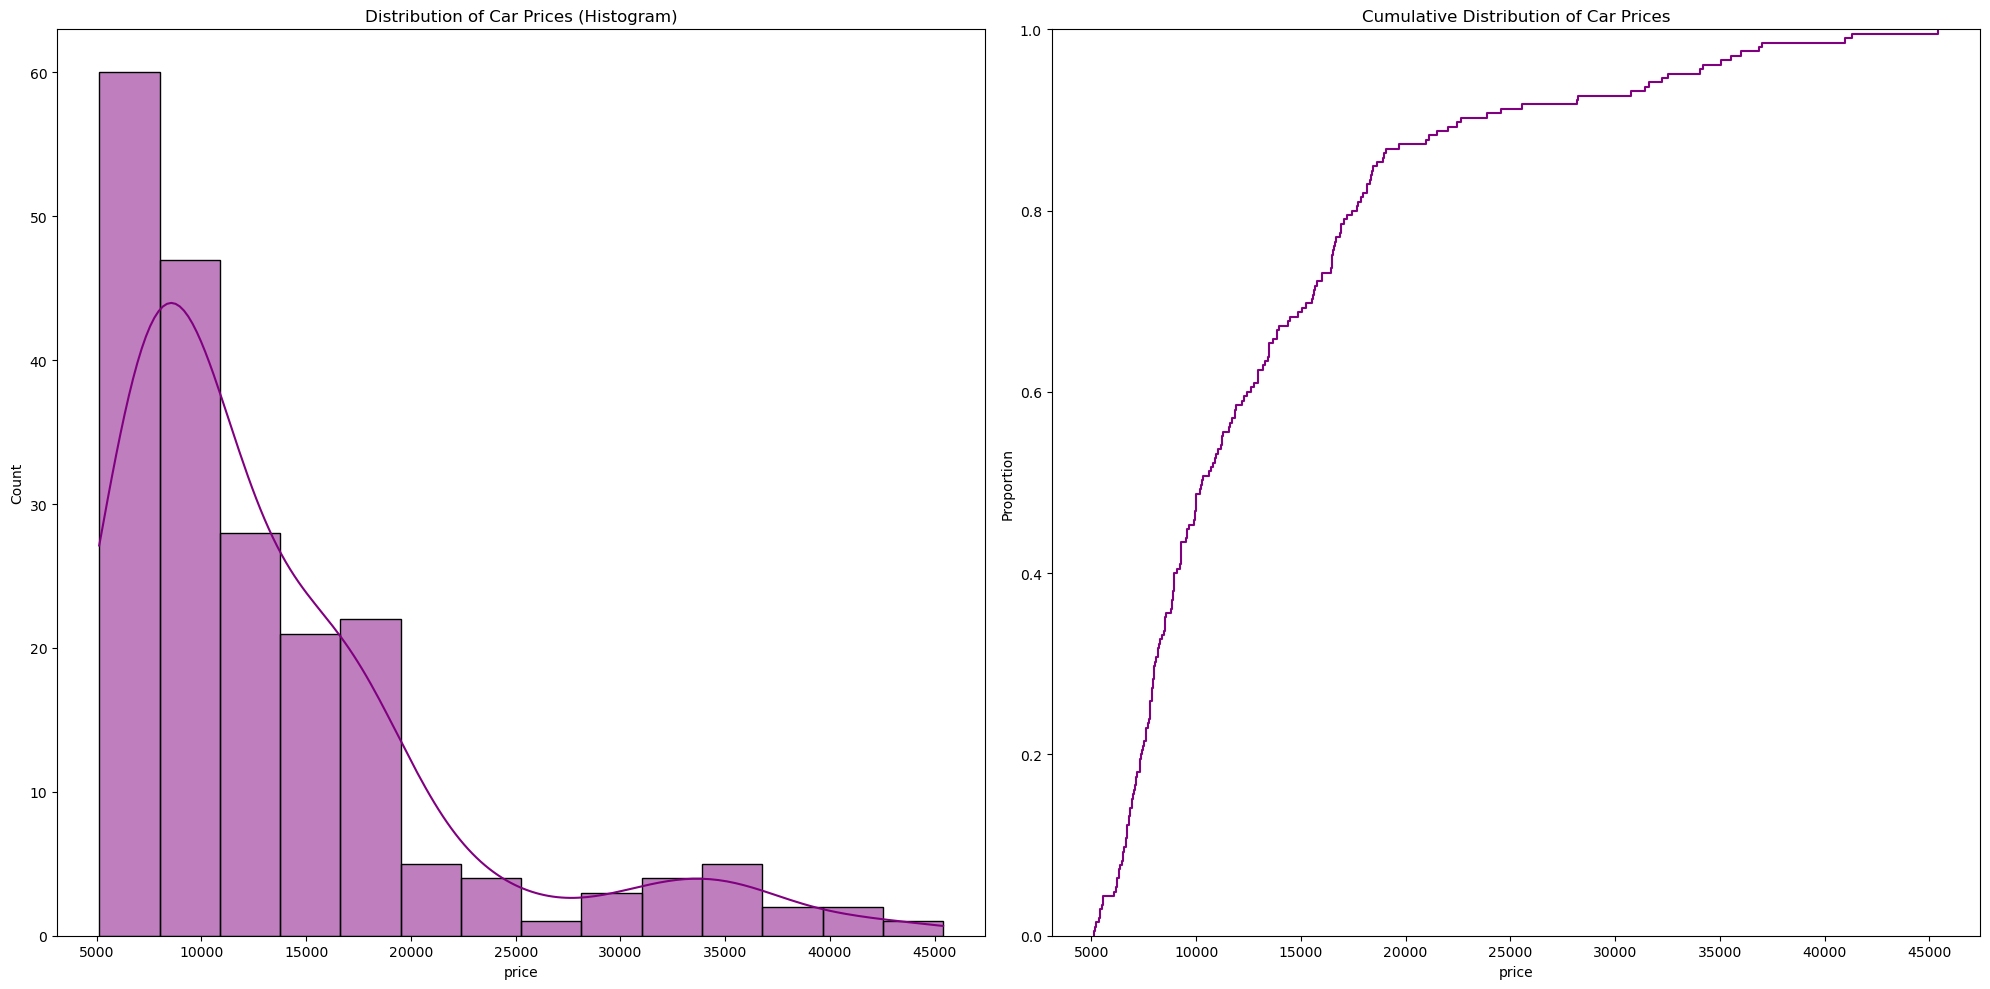

In [13]:
# Create a figure and a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the histogram on the first subplot
sns.histplot(x=data['price'], kde=True, color='purple', ax=ax1)
ax1.set_title('Distribution of Car Prices (Histogram)')

# Plot the ECDF on the second subplot
sns.ecdfplot(data=data['price'], color='purple', ax=ax2)
ax2.set_title('Cumulative Distribution of Car Prices')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

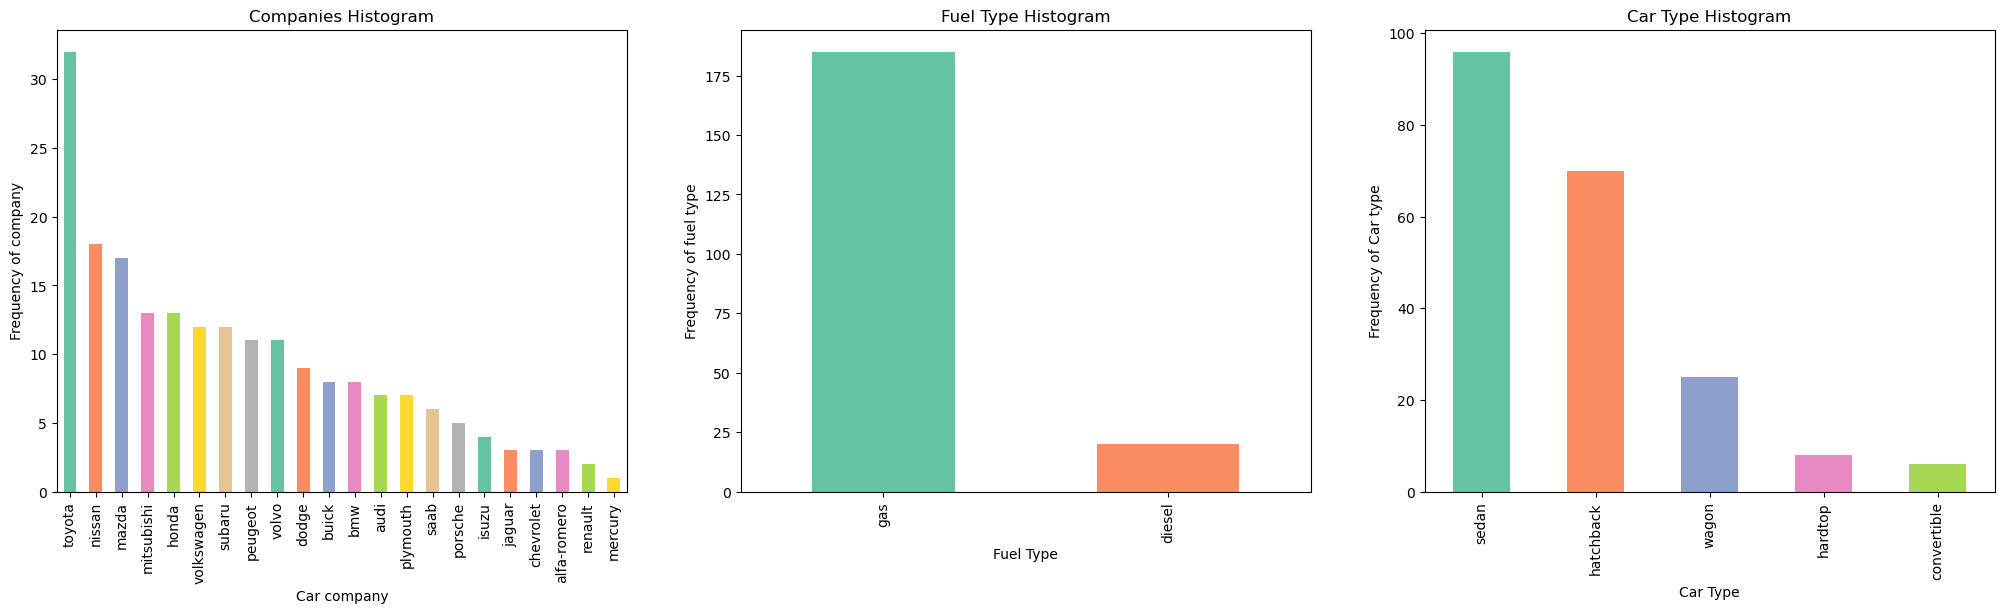

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. sedan is the top car type prefered.

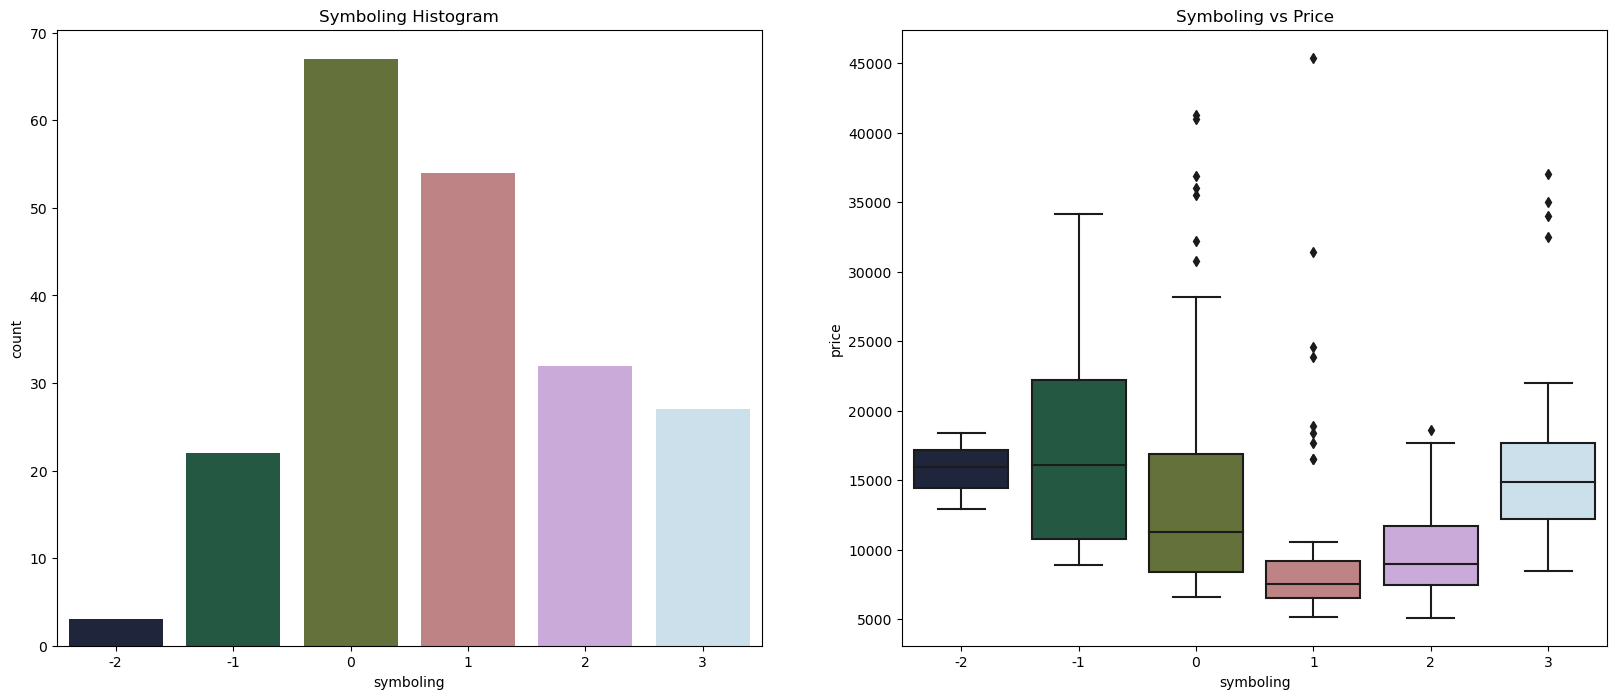

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data.symboling, y=data.price, palette=("cubehelix"))

plt.show()

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

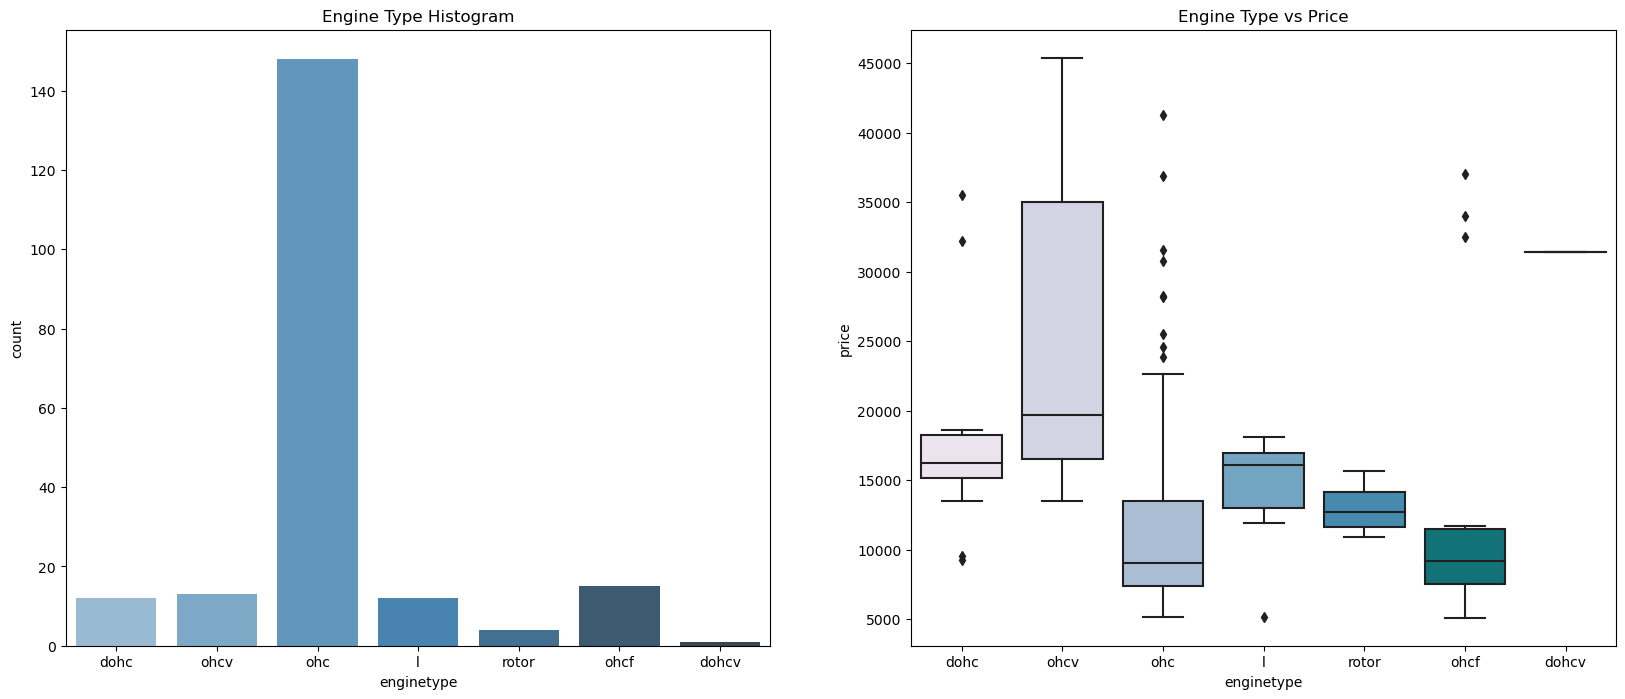

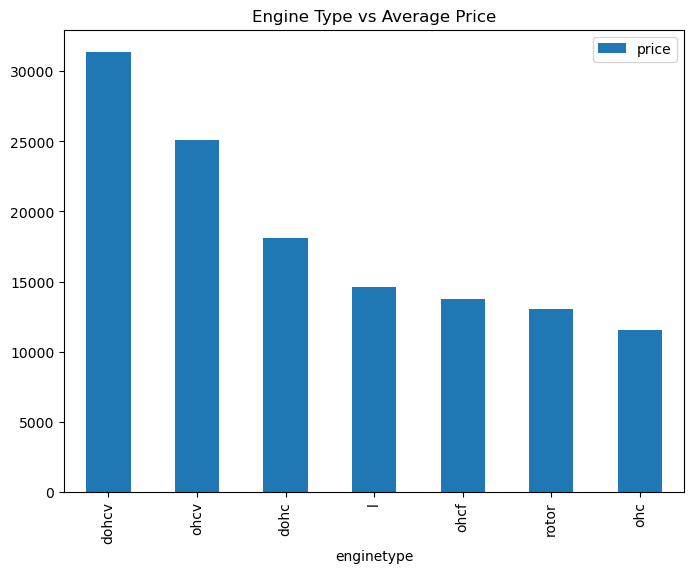

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 2500x600 with 0 Axes>

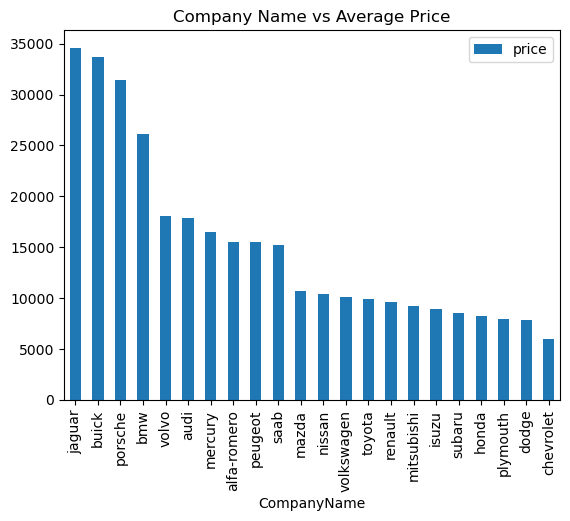

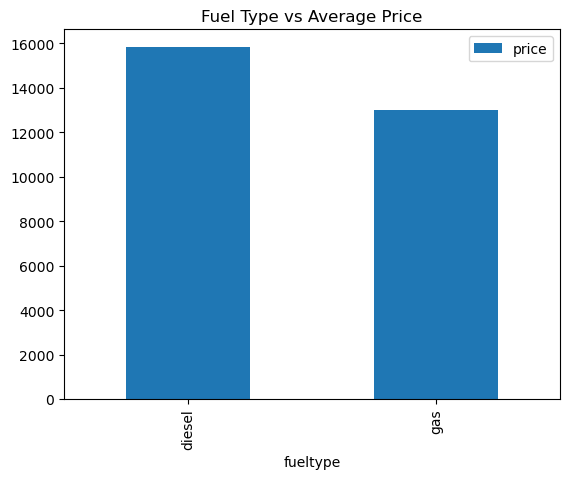

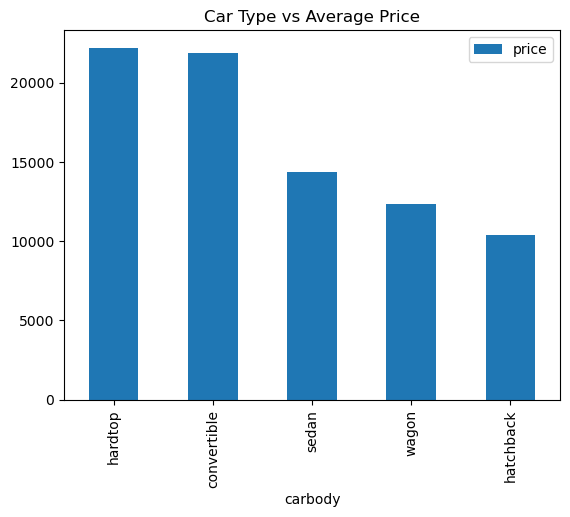

In [17]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

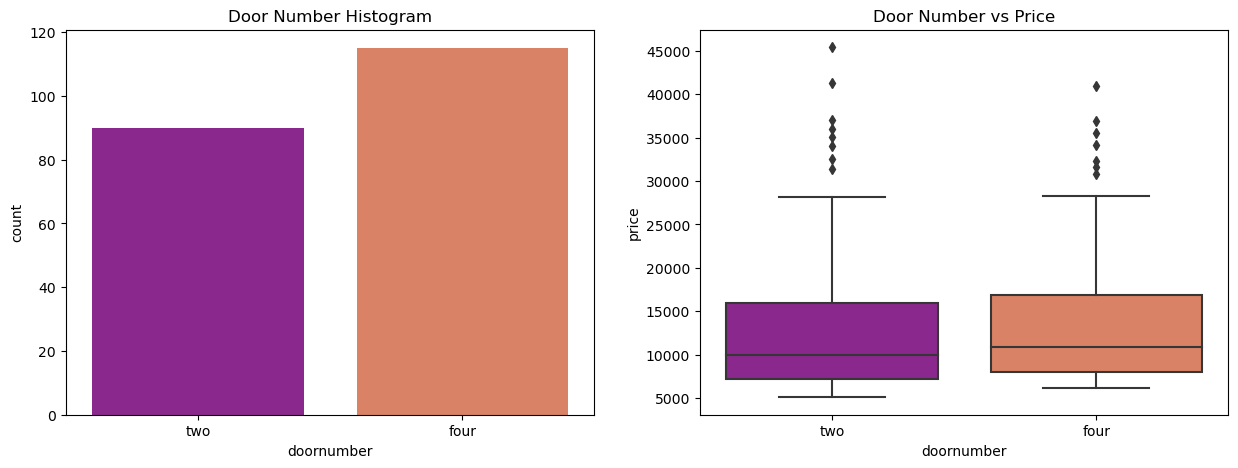

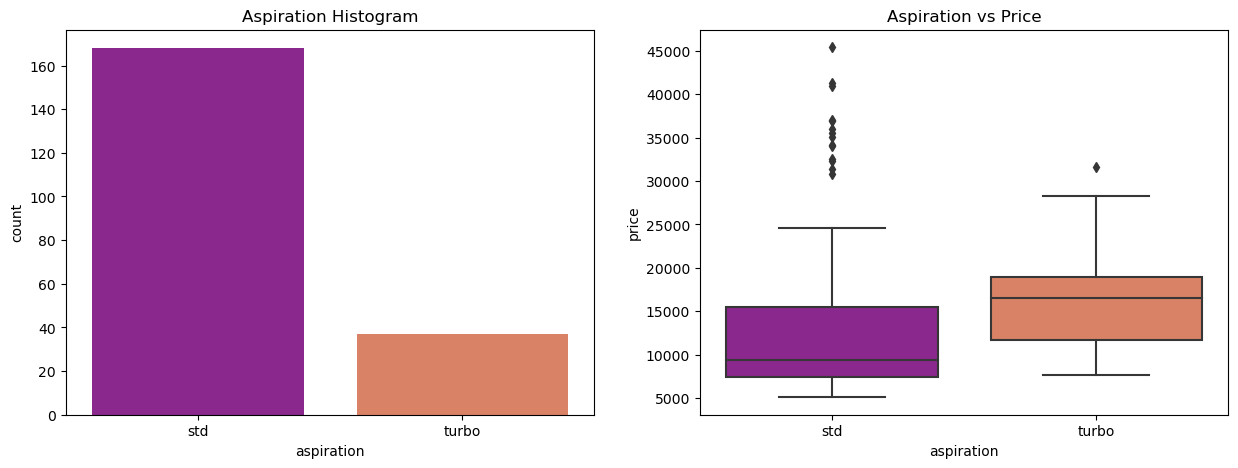

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))

plt.show()

1. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

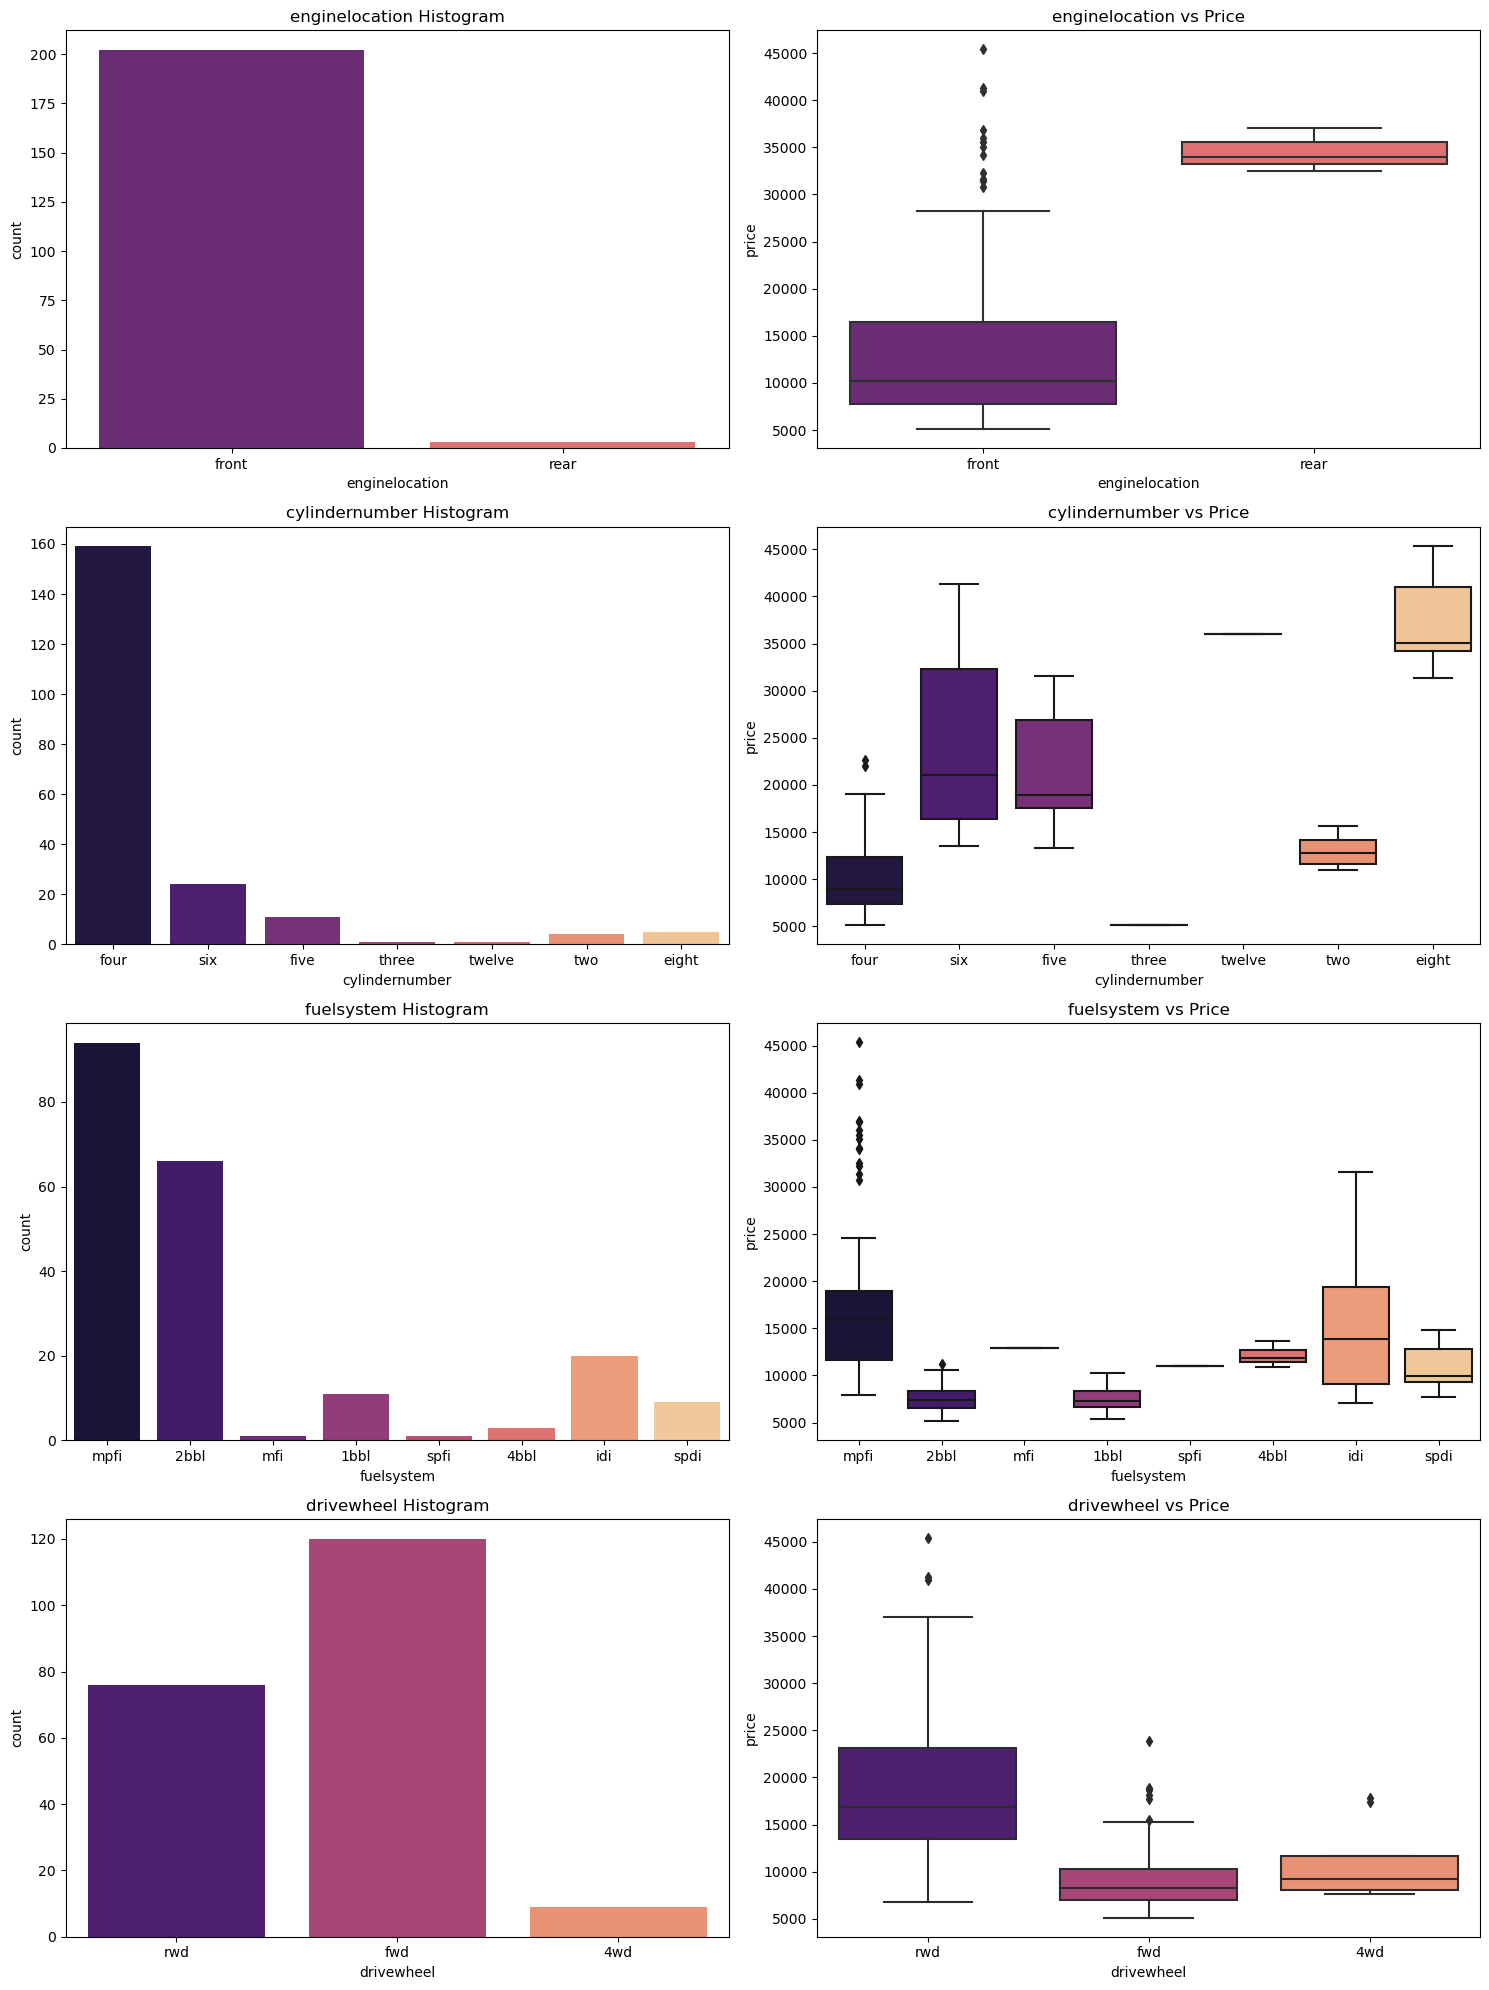

In [19]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference.
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

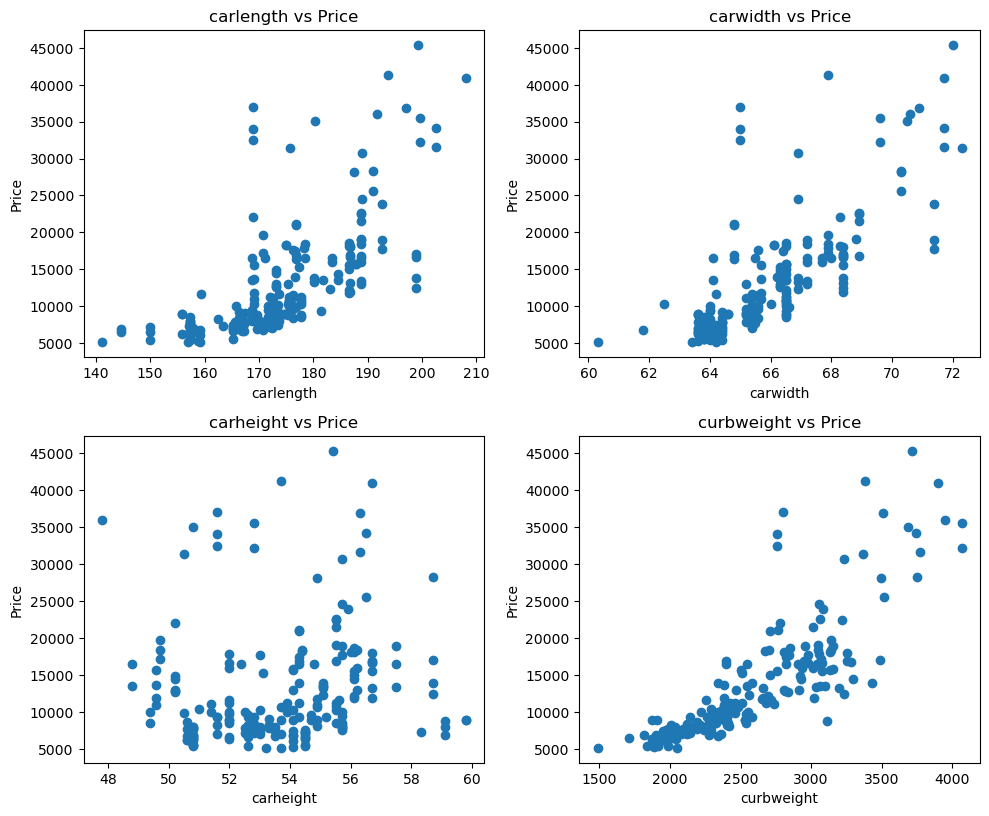

In [20]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.

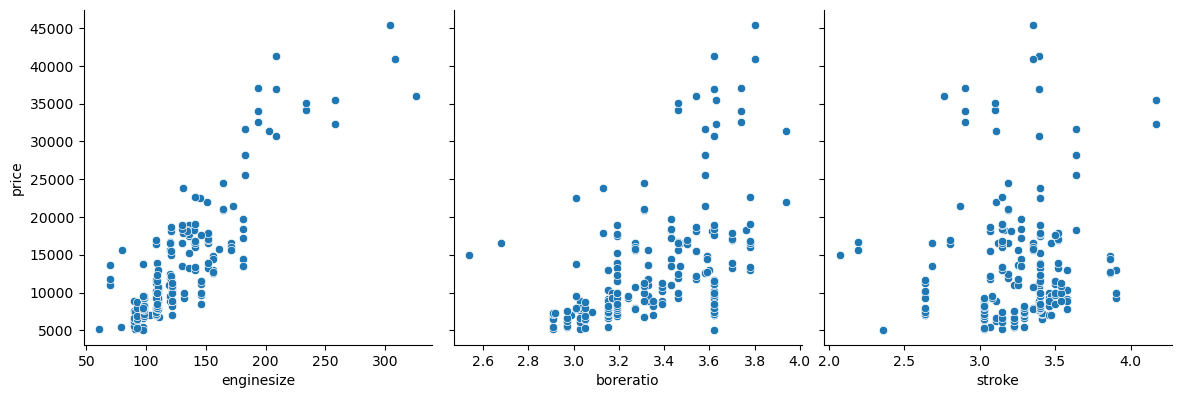

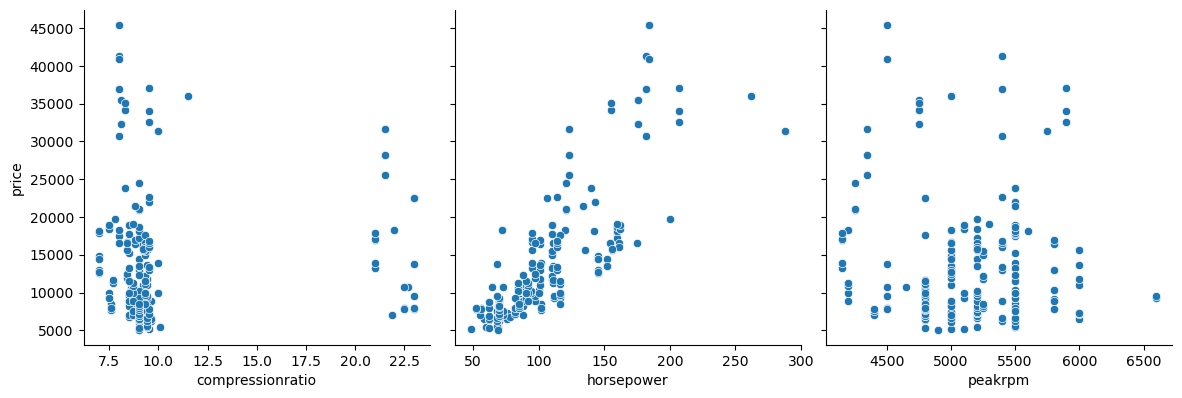

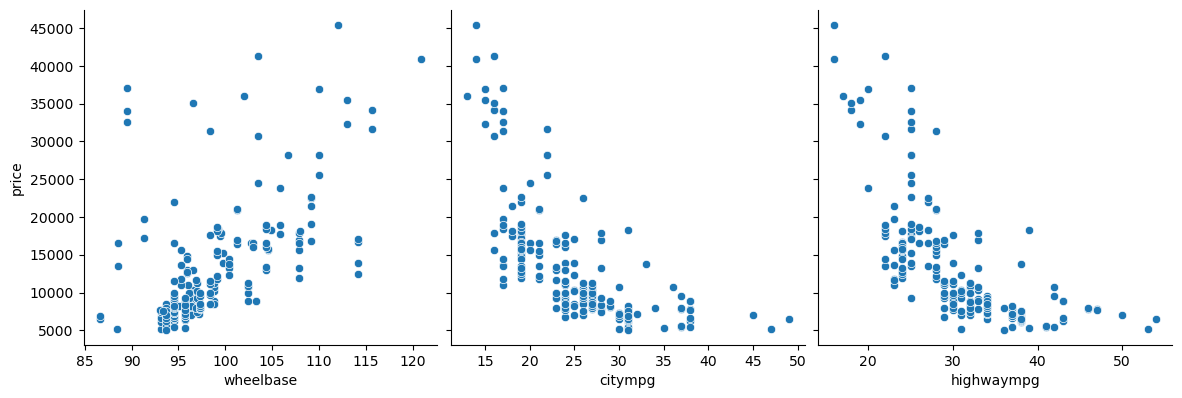

In [21]:
def pp(x,y,z):
    sns.pairplot(data, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [22]:
np.corrcoef(data['carlength'], data['carwidth'])[0, 1]

0.841118268481845

In [23]:
#Fuel economy
data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

In [24]:
data.dtypes

car_ID                int64
symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
fueleconomy         float64
dtype: object

In [25]:
#Binning the Car Companies based on avg prices of each Company.
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


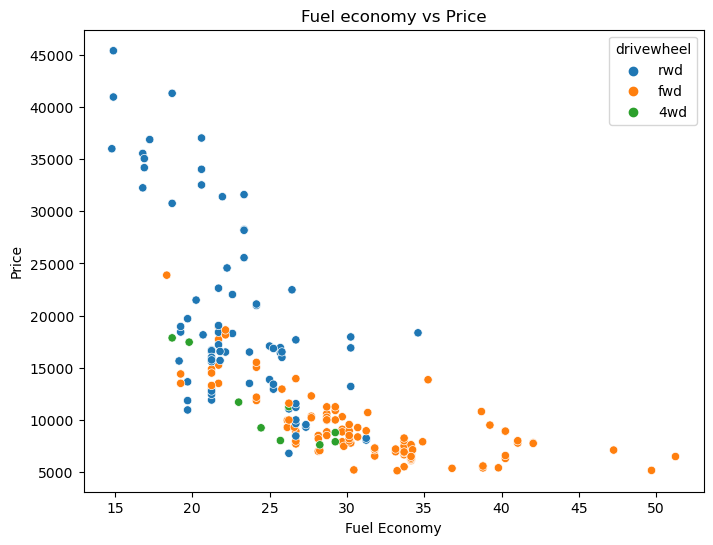

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=data['fueleconomy'],y=data['price'],hue=data['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 2500x600 with 0 Axes>

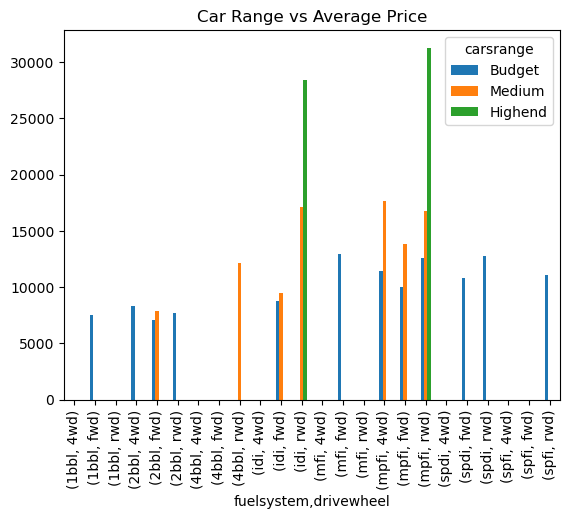

In [27]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [28]:
cars_lr = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [29]:
cars_lr.shape

(205, 16)

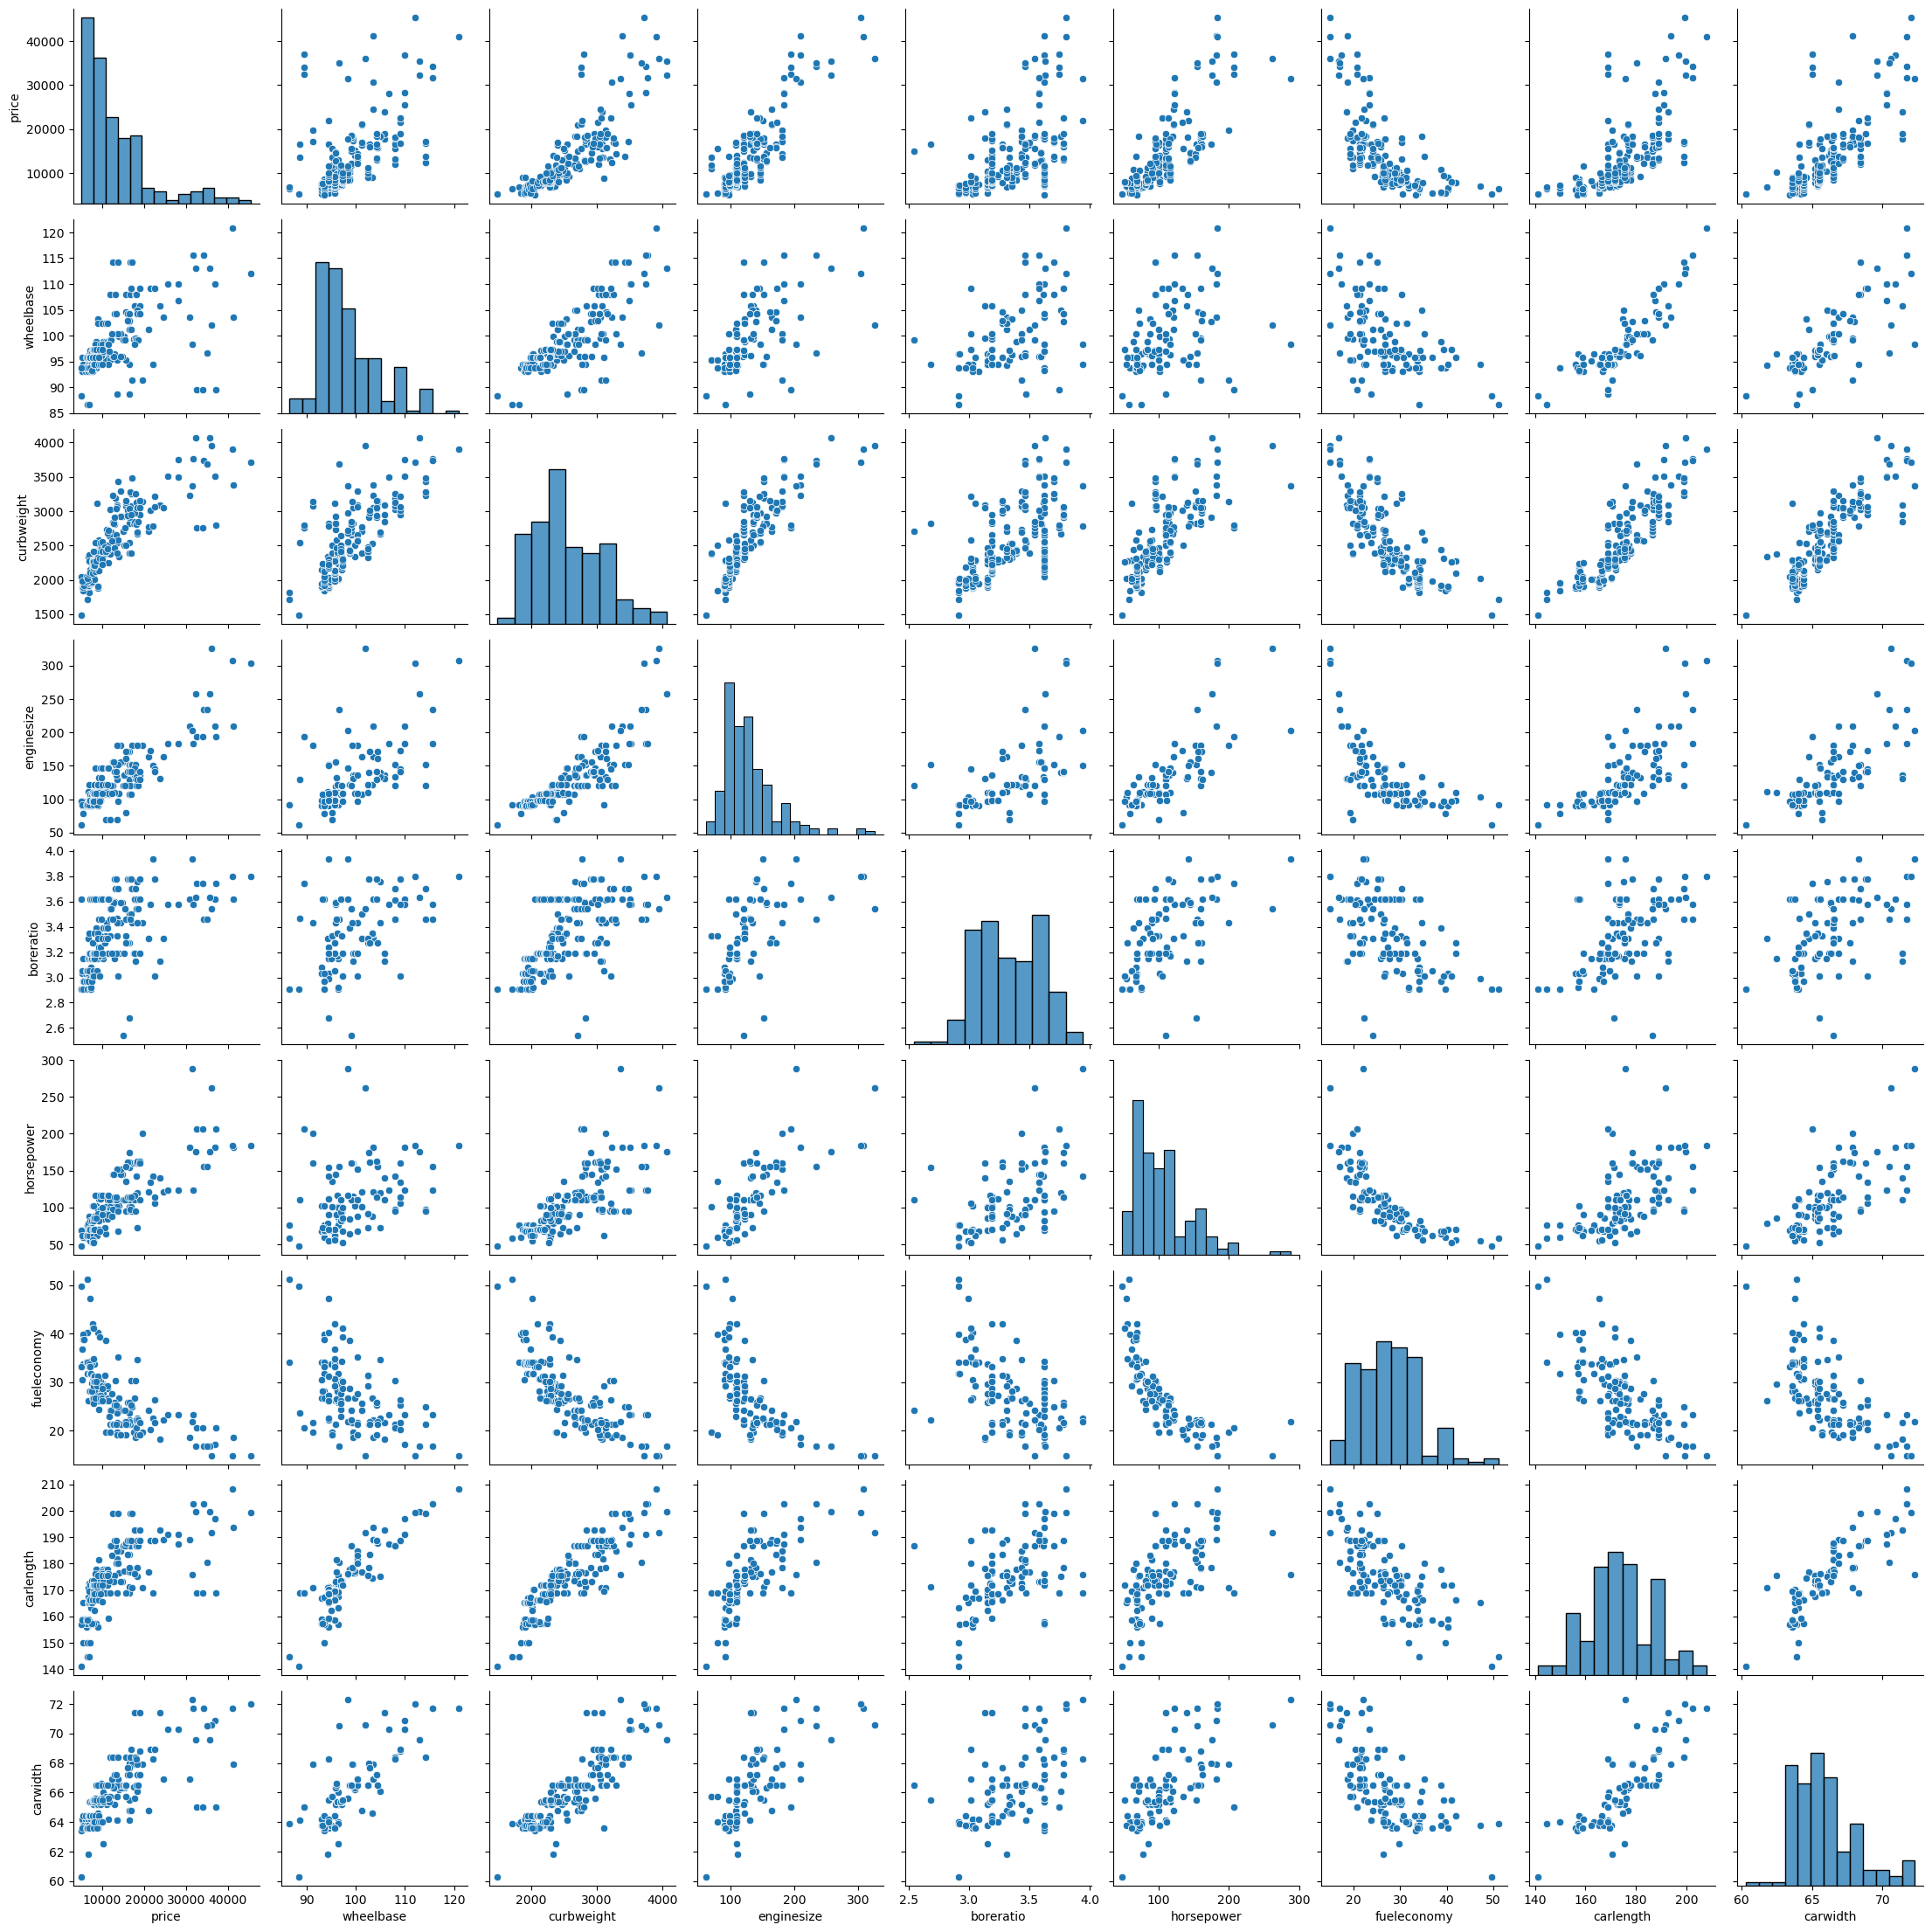

In [30]:
sns.pairplot(cars_lr)
plt.show()

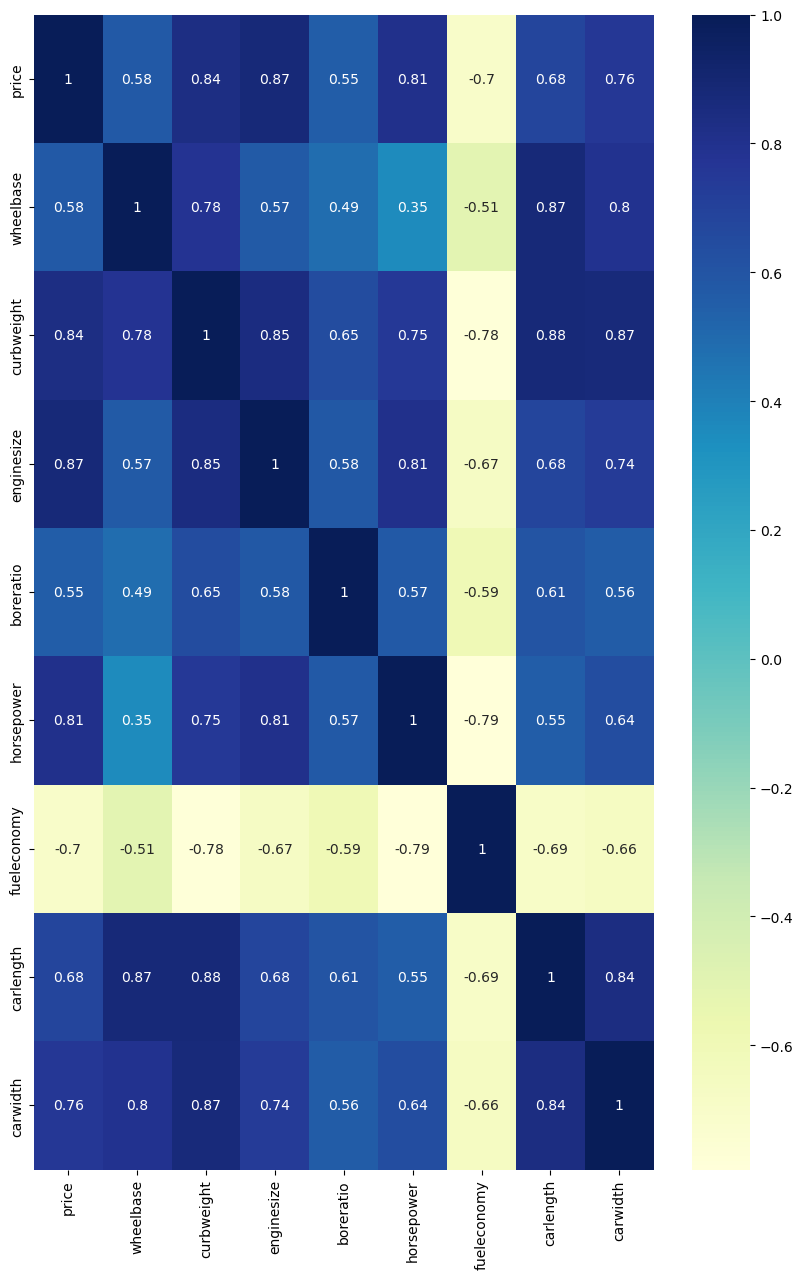

In [31]:
#Correlation using heatmap
plt.figure(figsize = (10, 15))
sns.heatmap(cars_lr.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

# ENCODING

In [32]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


# MODEL BUILDING

In [33]:
X=cars_lr.drop('price',axis=1)
y=cars_lr['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)

In [35]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth']
scaler = StandardScaler()
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars]=scaler.transform(X_test[num_vars])

In [36]:
X_train.shape

(164, 30)

In [37]:
X_train

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
3,0.256524,-0.343330,-0.372828,-0.419206,0.024240,-0.223468,0.290980,0.205880,1,0,...,0,0,0,1,0,0,0,0,1,0
157,-0.460676,-0.781780,-0.652371,-0.419206,-0.791203,0.733747,-0.558965,-0.630100,1,0,...,0,0,0,1,0,0,0,0,0,0
81,-0.355720,-0.360637,-0.042458,0.205437,-0.332517,-0.008280,-0.006088,-0.165667,1,0,...,0,0,0,1,0,0,0,0,0,0
32,-0.810530,-1.304842,-1.135218,-1.512333,-1.046029,1.720642,-1.904025,-0.815873,1,0,...,0,0,0,1,0,0,0,0,0,0
99,-0.198286,-0.368329,-0.093284,0.127357,-0.103173,0.288531,0.026919,-0.258553,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.355720,-0.216411,-0.347414,-0.497287,0.380996,-0.305091,-0.055600,-0.165667,1,1,...,0,0,0,1,0,0,0,0,0,0
103,0.361480,1.047016,1.456910,0.517759,1.298369,-0.965494,0.951132,0.345210,1,0,...,1,0,0,0,1,0,0,0,1,0
67,2.040777,1.921992,1.507736,1.103362,0.559374,-0.720625,1.471001,2.110055,0,1,...,0,0,1,0,0,0,0,0,0,1
24,-0.810530,-1.054849,-0.855675,-1.278091,-0.842168,0.882152,-1.301636,-0.908759,1,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
X_test

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,-0.460676,-0.810625,-0.652371,-0.419206,-0.791203,2.054554,-0.558965,-0.630100,1,0,...,0,0,0,1,0,0,0,0,0,0
186,-0.180793,-0.462558,-0.372828,-0.419206,-0.408964,0.288531,-0.113363,-0.119223,1,0,...,0,0,0,1,0,0,0,0,1,0
59,0.081597,-0.251025,-0.042458,0.361598,-0.434447,0.073343,0.390003,0.345210,1,0,...,0,0,0,1,0,0,0,0,1,0
165,-0.670588,-0.481788,-0.652371,-0.224005,0.279065,-0.127004,-0.360920,-0.815873,1,0,...,0,0,0,1,0,0,0,0,0,0
140,-0.880500,-0.529863,-0.398241,1.259523,-0.714755,0.006561,-1.301636,-0.908759,1,0,...,0,0,0,1,0,0,0,0,0,0
64,0.081597,-0.174104,-0.042458,0.361598,-0.434447,0.073343,0.390003,0.345210,1,0,...,0,0,0,1,0,0,0,0,1,0
198,1.043694,1.018171,0.160846,1.259523,1.553194,-1.329087,1.297712,0.670313,1,1,...,0,0,0,1,0,0,0,0,1,0
75,0.763811,0.758563,0.414976,1.884167,1.884468,-1.032277,0.439514,1.041859,1,1,...,0,0,0,1,0,0,0,0,1,0
172,0.011626,0.883559,0.567454,1.259523,0.380996,-0.223468,0.257972,-0.072780,1,0,...,0,0,0,1,0,0,0,0,0,0
104,-1.230354,1.068169,1.456910,0.517759,1.502229,-0.965494,-0.195882,0.995416,1,0,...,1,0,0,0,1,0,0,0,1,0


In [39]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 11),
 ('curbweight', False, 3),
 ('enginesize', False, 16),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('fueleconomy', False, 9),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('gas', False, 19),
 ('turbo', False, 18),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 10),
 ('dohcv', True, 1),
 ('l', False, 14),
 ('ohc', False, 4),
 ('ohcf', False, 5),
 ('ohcv', False, 2),
 ('rotor', False, 20),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 8),
 ('three', False, 12),
 ('twelve', False, 7),
 ('two', False, 21),
 ('Medium', False, 6),
 ('Highend', True, 1)]

In [42]:
X_train.columns[rfe.support_]

Index(['horsepower', 'carwidth', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'five', 'four', 'Highend'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [43]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,horsepower,carwidth,hardtop,hatchback,sedan,wagon,dohcv,five,four,Highend
3,0.024240,0.205880,0,0,1,0,0,0,1,0
157,-0.791203,-0.630100,0,1,0,0,0,0,1,0
81,-0.332517,-0.165667,0,1,0,0,0,0,1,0
32,-1.046029,-0.815873,0,1,0,0,0,0,1,0
99,-0.103173,-0.258553,0,1,0,0,0,0,1,0


In [44]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [45]:
checkVIF(X_train_rfe)

,Features,VIF
8,four,8.16
4,sedan,4.68
3,hatchback,3.31
0,horsepower,2.92
1,carwidth,2.42
5,wagon,2.10
9,Highend,1.76
7,five,1.63
2,hardtop,1.28
6,dohcv,1.22


In [46]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     194.6
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.21e-81
Time:                        14:05:45   Log-Likelihood:                -1484.9
No. Observations:                 164   AIC:                             2992.
Df Residuals:                     153   BIC:                             3026.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.856e+04   1165.240     15.927      0.0

p-vale of five seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [47]:
X_train_new = X_train_new.drop(["five"], axis = 1)

In [48]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     213.9
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.66e-82
Time:                        14:05:45   Log-Likelihood:                -1486.2
No. Observations:                 164   AIC:                             2992.
Df Residuals:                     154   BIC:                             3023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.808e+04   1129.430     16.009      0.0

In [49]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,45.11
5,sedan,9.42
4,hatchback,8.65
6,wagon,5.11
1,horsepower,2.93
2,carwidth,2.11
8,four,2.06
3,hardtop,1.76
9,Highend,1.70
7,dohcv,1.23


dropping sedan because of high VIF value. (shows that curbweight has high multicollinearity.)

In [50]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [51]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     213.9
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.17e-79
Time:                        14:05:45   Log-Likelihood:                -1495.6
No. Observations:                 164   AIC:                             3009.
Df Residuals:                     155   BIC:                             3037.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.376e+04    556.698     24.716      0.0

In [52]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.84
1,horsepower,2.81
7,four,2.05
2,carwidth,2.03
8,Highend,1.68
4,hatchback,1.25
6,dohcv,1.23
5,wagon,1.12
3,hardtop,1.08


dropping wagon because of high P value.

In [53]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

In [54]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     244.1
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.25e-80
Time:                        14:05:45   Log-Likelihood:                -1496.2
No. Observations:                 164   AIC:                             3008.
Df Residuals:                     156   BIC:                             3033.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.363e+04    543.308     25.087      0.0

In [55]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.36
1,horsepower,2.81
6,four,2.05
2,carwidth,2.02
7,Highend,1.66
5,dohcv,1.23
4,hatchback,1.15
3,hardtop,1.07


dropping hardtop because of high p-value.

In [56]:
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

In [57]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     286.6
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           7.10e-82
Time:                        14:05:45   Log-Likelihood:                -1496.2
No. Observations:                 164   AIC:                             3006.
Df Residuals:                     157   BIC:                             3028.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.363e+04    541.280     25.180      0.0

In [58]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.35
1,horsepower,2.70
5,four,2.05
2,carwidth,1.95
6,Highend,1.66
4,dohcv,1.22
3,hatchback,1.13


In [59]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     307.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.98e-79
Time:                        14:05:45   Log-Likelihood:                -1505.2
No. Observations:                 164   AIC:                             3022.
Df Residuals:                     158   BIC:                             3041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.402e+04    561.513     24.971      0.0

,Features,VIF
0,const,9.08
1,horsepower,2.47
4,four,1.98
2,carwidth,1.95
5,Highend,1.65
3,hatchback,1.10


In [60]:
X_train_new

,const,horsepower,carwidth,hatchback,four,Highend
3,1.0,0.024240,0.205880,0,1,0
157,1.0,-0.791203,-0.630100,1,1,0
81,1.0,-0.332517,-0.165667,1,1,0
32,1.0,-1.046029,-0.815873,1,1,0
99,1.0,-0.103173,-0.258553,1,1,0
...,...,...,...,...,...,...
87,1.0,0.380996,-0.165667,0,1,0
103,1.0,1.298369,0.345210,0,0,0
67,1.0,0.559374,2.110055,0,0,1
24,1.0,-0.842168,-0.908759,1,1,0


 Residual Analysis of Model

In [61]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

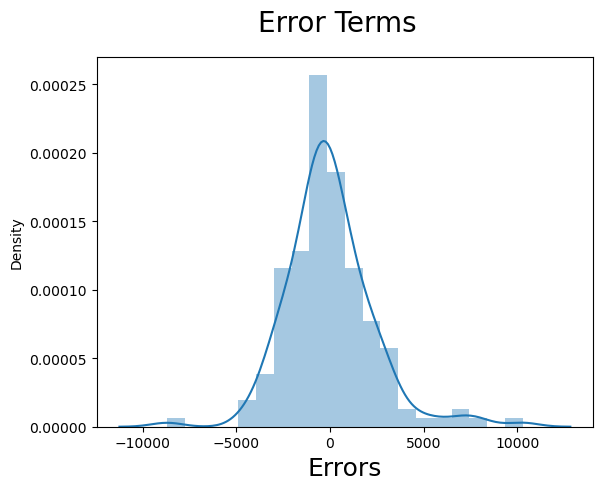

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# PREDICTION AND EVALUATION

In [63]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [64]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [66]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8917109917902725

Text(0, 0.5, 'y_pred')

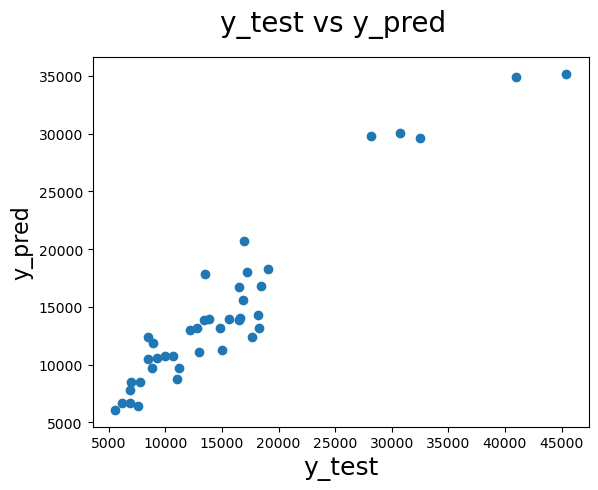

In [67]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)   

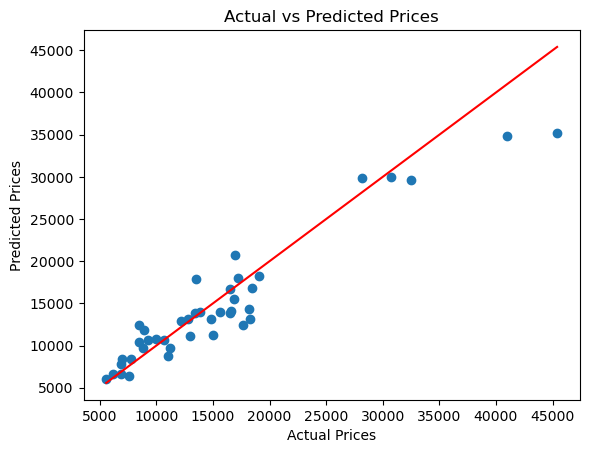

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line for perfect predictions
plt.show()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     307.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.98e-79
Time:                        14:05:46   Log-Likelihood:                -1505.2
No. Observations:                 164   AIC:                             3022.
Df Residuals:                     158   BIC:                             3041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.402e+04    561.513     24.971      0.0

1. R-sqaured and Adjusted R-squared (extent of fit) - 0.907 and 0.899 - 90% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) - 307.0 and 1.98e-79(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

### SAVING MODEL AND MODEL PREDICTION WITH NEW VALUES

In [70]:
#Define final features
final_features = ['horsepower', 'carwidth', 'hatchback', 'four', 'Highend']

# Assume X_train and y_train are already defined
# Prepare final training data
X_train_final = X_train[final_features]

In [71]:
# Scale only the features you need
scaler = StandardScaler()
X_train_final[final_features] = scaler.fit_transform(X_train_final[final_features])

In [72]:
X_train_final

,horsepower,carwidth,hatchback,four,Highend
3,0.024240,0.205880,-0.720082,0.558570,-0.351123
157,-0.791203,-0.630100,1.388730,0.558570,-0.351123
81,-0.332517,-0.165667,1.388730,0.558570,-0.351123
32,-1.046029,-0.815873,1.388730,0.558570,-0.351123
99,-0.103173,-0.258553,1.388730,0.558570,-0.351123
...,...,...,...,...,...
87,0.380996,-0.165667,-0.720082,0.558570,-0.351123
103,1.298369,0.345210,-0.720082,-1.790287,-0.351123
67,0.559374,2.110055,-0.720082,-1.790287,2.848001
24,-0.842168,-0.908759,1.388730,0.558570,-0.351123


In [73]:
# Adding a constant variable 
X_train_scaled_with_const = sm.add_constant(X_train_final)

In [74]:
import joblib
joblib.dump(scaler, 'pricescaler.joblib')

['pricescaler.joblib']

In [75]:
X_train_scaled_with_const

,const,horsepower,carwidth,hatchback,four,Highend
3,1.0,0.024240,0.205880,-0.720082,0.558570,-0.351123
157,1.0,-0.791203,-0.630100,1.388730,0.558570,-0.351123
81,1.0,-0.332517,-0.165667,1.388730,0.558570,-0.351123
32,1.0,-1.046029,-0.815873,1.388730,0.558570,-0.351123
99,1.0,-0.103173,-0.258553,1.388730,0.558570,-0.351123
...,...,...,...,...,...,...
87,1.0,0.380996,-0.165667,-0.720082,0.558570,-0.351123
103,1.0,1.298369,0.345210,-0.720082,-1.790287,-0.351123
67,1.0,0.559374,2.110055,-0.720082,-1.790287,2.848001
24,1.0,-0.842168,-0.908759,1.388730,0.558570,-0.351123


In [76]:
# Fit the model using the final features
lm_final = sm.OLS(y_train, X_train_scaled_with_const).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     307.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.98e-79
Time:                        14:05:46   Log-Likelihood:                -1505.2
No. Observations:                 164   AIC:                             3022.
Df Residuals:                     158   BIC:                             3041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.276e+04    186.353     68.478      0.0

In [77]:
# Save the model and scaler
joblib.dump(lm_final, 'car_model.joblib')

['car_model.joblib']

In [78]:
# Prepare new data for prediction
new_data = {
    'horsepower': [102],  
    'carwidth': [66.2],     
    'hatchback': [0],         
    'four': [1],
    'Highend': [0]
}
new_df = pd.DataFrame(new_data)

print(new_df)

   horsepower  carwidth  hatchback  four  Highend
0         102      66.2          0     1        0


In [79]:
# Load the scaler
scaler_car = joblib.load('pricescaler.joblib')

In [80]:
# Scale the new data
new_df_scaled = scaler_car.transform(new_df[final_features])

In [81]:
# Step 3: Convert scaled data back to DataFrame
new_df_scaled = pd.DataFrame(new_df_scaled,columns=final_features)

In [82]:
new_df_scaled.insert(0, 'const', 1) 

In [83]:
# Predict the price using the model
predicted_price = lm_final.predict(new_df_scaled)

# Output the predicted price
print("Predicted Price:", predicted_price[0])

Predicted Price: 394457.29041170474
